# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium
!pip install geopy

In [3]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [9]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [11]:
train_data = train_data.drop('dropoff_datetime', axis = 1)
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

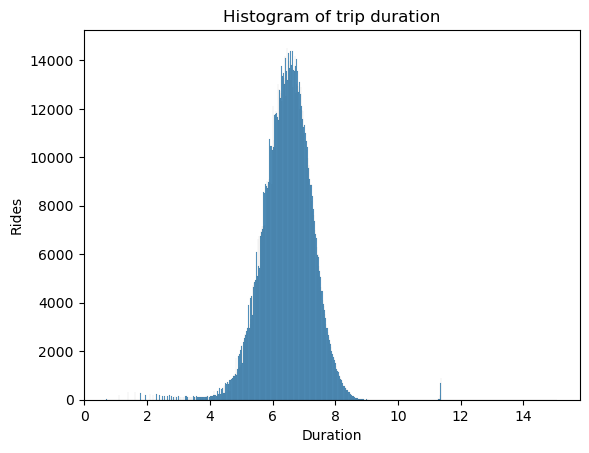

In [13]:
import seaborn as sns
train_data['trip_duration_log'] = np.log1p(train_data['trip_duration'].values)

sns_plot = sns.histplot(train_data['trip_duration_log'])
fig = sns_plot.get_figure()

plt.title('Histogram of trip duration')
plt.xlabel('Duration')
plt.ylabel('Rides')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

ну в основном поездка длилась e^5-6-7 по времени, имеются приколямбусы в виде выбросов

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

./есть предположение, предикт вайб/.

если поездка заняла долгое время, то вряд-ли это проблема или выброс в данных, вполне себе реальная ситуация поехать на такси в другой город. Но вот слишком короткая поездка - странное явление, от падика до падика стрем такси заказывать, поэтому такие явления будем штрафовать больше, чем долгие поездки

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: особо не понял в чем задача, заменили на логи метку и предикт - получили мсе под корнем, но эта та же задача что и мсе как концепция, разница только что под корнем но на обучение не влияет, корень влияет только на размерность

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
#было

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [15]:
from sklearn.metrics import make_scorer

def rmsle(log1p_y_true, log1p_y_pred):
    error = (log1p_y_true - log1p_y_pred) ** 2
    return np.sqrt(np.mean(error))

rmsle_scorer = make_scorer(
    rmsle,
    greater_is_better=False
)

rmsle_best_const = rmsle(
    train_data['trip_duration_log'],
    train_data['trip_duration_log'].mean())

print(rmsle_best_const)

assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

Text(0.5, 1.0, 'Зависимость количества поездок от дня в году')

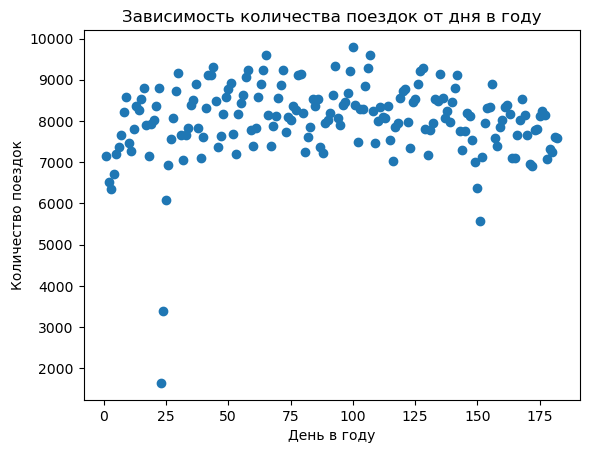

In [17]:
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
rides_per_day = train_data.groupby('day_of_year').size()

plt.scatter(rides_per_day.index, rides_per_day.values, marker = 'o')
plt.xlabel('День в году')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от дня в году')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [19]:
# найдем эти чертовы аномалии
from datetime import datetime, timedelta

rides_per_day = pd.Series(rides_per_day)
days_anom = rides_per_day[rides_per_day < 4000]
print(days_anom)

df_anom_values = pd.DataFrame({'year': [2016,2016],
                   'month': [1,1],
                   'day': [23,24]})
pd.to_datetime(df_anom_values)
print(df_anom_values)

# там корочи в эти дни власти запретили рассекать на лайбах из-за фуфлопогоды



day_of_year
23    1648
24    3383
dtype: int64
   year  month  day
0  2016      1   23
1  2016      1   24


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

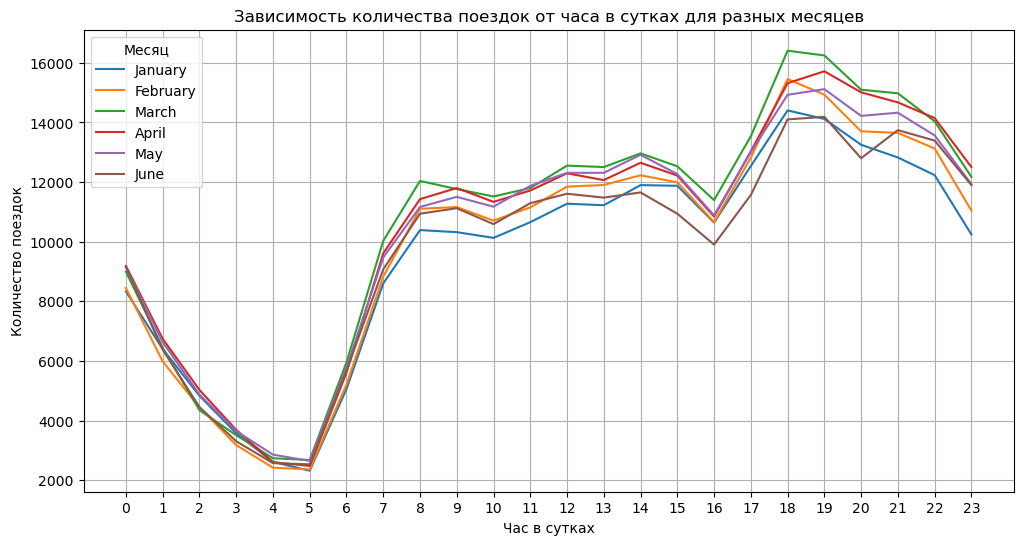

In [21]:
import calendar
# группируем здесь по часам и месяцам
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour
train_data['month'] = train_data['pickup_datetime'].dt.month
rides_per_hour_month = train_data.groupby(['month', 'hour_of_day']).size().unstack(level=0)

# загптшил ренейм для цифр месяцев
month_names = {i: calendar.month_name[i] for i in range(1, 13)}
rides_per_hour_month.rename(columns=month_names, inplace=True)

plt.figure(figsize=(12, 6))

# строим график
for month in rides_per_hour_month.columns:
    plt.plot(rides_per_hour_month.index, rides_per_hour_month[month], label=f'{month}')

plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.title('Зависимость количества поездок от часа в сутках для разных месяцев')
plt.xticks(range(24))
plt.legend(title="Месяц")
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

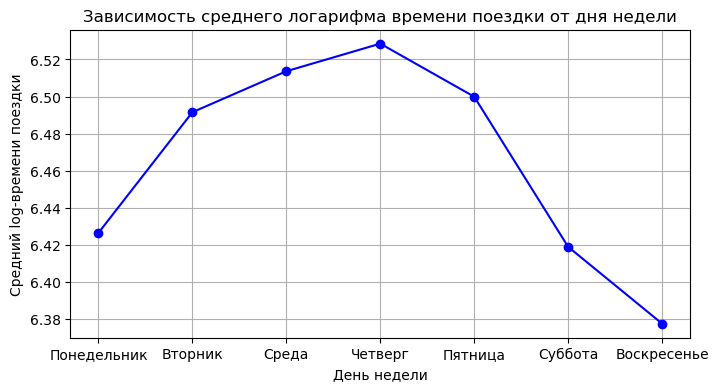

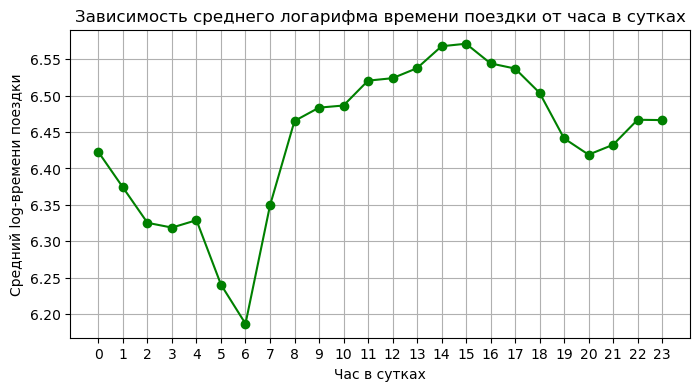

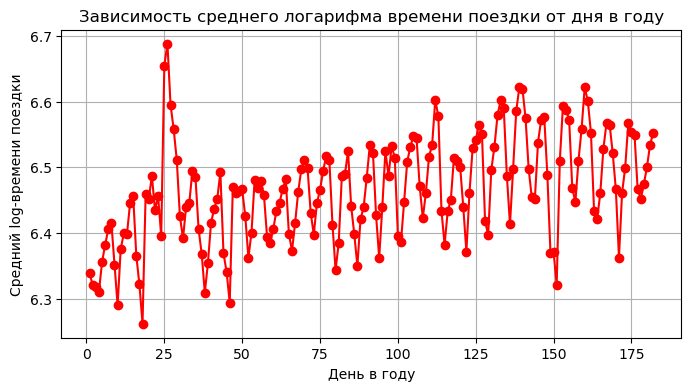

In [23]:
from sklearn.model_selection import train_test_split

y = train_data['trip_duration_log']
X = train_data.drop(columns=['trip_duration_log'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear

avg_trip_duration_weekday = train_data.groupby('day_of_week')['trip_duration_log'].mean()

weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

plt.figure(figsize=(8, 4))
plt.plot(weekdays, avg_trip_duration_weekday, marker='o', linestyle='-', color='b')
plt.xlabel('День недели')
plt.ylabel('Средний log-времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.grid(True)
plt.show()

avg_trip_duration_hour = train_data.groupby('hour_of_day')['trip_duration_log'].mean()

plt.figure(figsize=(8, 4))
plt.plot(avg_trip_duration_hour.index, avg_trip_duration_hour, marker='o', linestyle='-', color='g')
plt.xlabel('Час в сутках')
plt.ylabel('Средний log-времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

avg_trip_duration_day = train_data.groupby('day_of_year')['trip_duration_log'].mean()

plt.figure(figsize=(8, 4))
plt.plot(avg_trip_duration_day.index, avg_trip_duration_day, marker='o', linestyle='-', color='r')
plt.xlabel('День в году')
plt.ylabel('Средний log-времени поездки')
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.grid(True)
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [25]:
'''train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
'''
train_data['is_anom'] = train_data['day_of_year'].isin([23, 24]).astype(int)

# Выведем первые строки с новыми признаками
train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_year,hour_of_day,month,day_of_week,is_anom
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,17,3,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,0,6,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,11,1,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,19,4,2,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,13,3,5,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?


день в неделе, месяц, аномалия. час - непрерывная величина, это не категория

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [27]:

features = train_data.columns
print(features)


Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_duration_log', 'day_of_year', 'hour_of_day', 'month',
       'day_of_week', 'is_anom'],
      dtype='object')


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

df_new = train_data[['trip_duration', 'day_of_week', 'month', 'hour_of_day', 
                     'day_of_year', 'is_anom']]

cat_features = ['month', 'is_anom', 'day_of_week']
numeric_features = ['hour_of_day', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = df_new['trip_duration']
X = df_new.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

rmse_test = root_mean_squared_error(y_test, y_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")

Test RMSE: 5545.7350
Train RMSE: 5099.1579


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [35]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [37]:
def lat_lot_values(df, n):
    return df[['pickup_latitude', 'pickup_longitude']].sample(n)
    
sample = lat_lot_values(train_data, 1000)

your_lat_values = sample['pickup_latitude']
your_lon_values = sample['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

очевидно - аэропорты там

**Задание 6 (0.75 балл).** Как мы все прекрасно помним, t = s / v
, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию haversine. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку haversine:

In [39]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train_data.loc[:, 'haversine'] = haversine_array(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [41]:
# log(haversine) = log(t) + log(Vср)

train_data['log_haversine'] = np.log1p(train_data['haversine'])
train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_year,hour_of_day,month,day_of_week,is_anom,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,17,3,0,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,0,6,6,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,11,1,1,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,19,4,2,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,13,3,5,0,1.188588,0.783257


Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [43]:
corrmat = train_data[['trip_duration_log', 'haversine', 'log_haversine']].corr()
corrmat

,trip_duration_log,haversine,log_haversine
trip_duration_log,1.000000,0.573595,0.749882
haversine,0.573595,1.000000,0.844501
log_haversine,0.749882,0.844501,1.000000


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

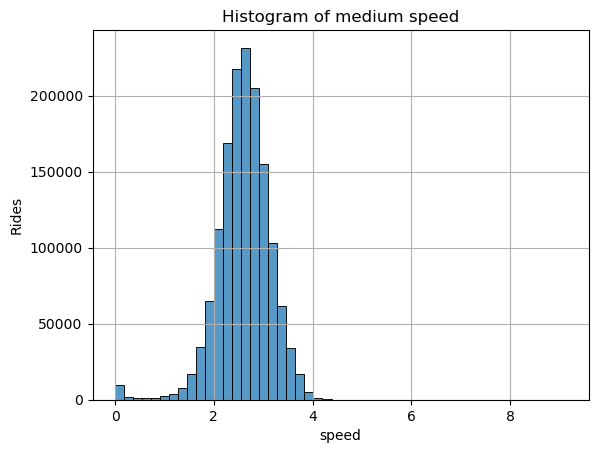

In [45]:
train_data['med_speed'] = train_data['haversine'] / (train_data['trip_duration'] / 3600)

sns_plot = sns.histplot(np.log1p(train_data['med_speed']), bins = 50)
fig = sns_plot.get_figure()

plt.title('Histogram of medium speed')
plt.xlabel('speed')
plt.ylabel('Rides')
plt.grid(True)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

0.10     6.468920
0.25     9.121275
0.50    12.791979
0.75    17.844912
0.90    24.353916
Name: med_speed, dtype: float64


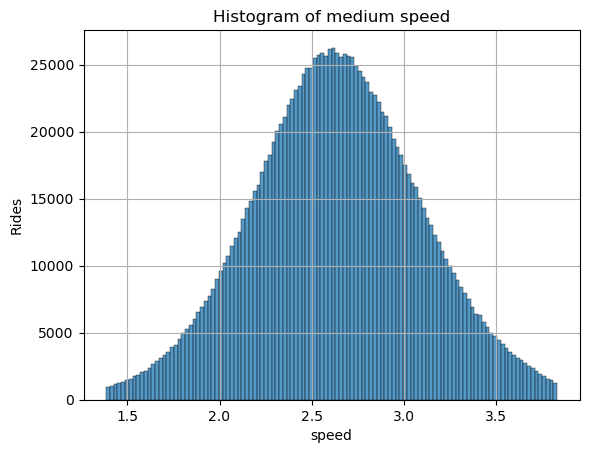

In [47]:
quantiles = train_data['med_speed'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print(quantiles)
# будем считать больше 25 миль час аномалией, так как это выше правил
train_data = train_data[train_data['med_speed'] < 45] 
train_data = train_data[train_data['med_speed'] > 3] 

sns_plot = sns.histplot(np.log1p(train_data['med_speed']), bins = 120)
fig = sns_plot.get_figure()

plt.title('Histogram of medium speed')
plt.xlabel('speed')
plt.ylabel('Rides')
plt.grid(True)
plt.show()

#красота

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

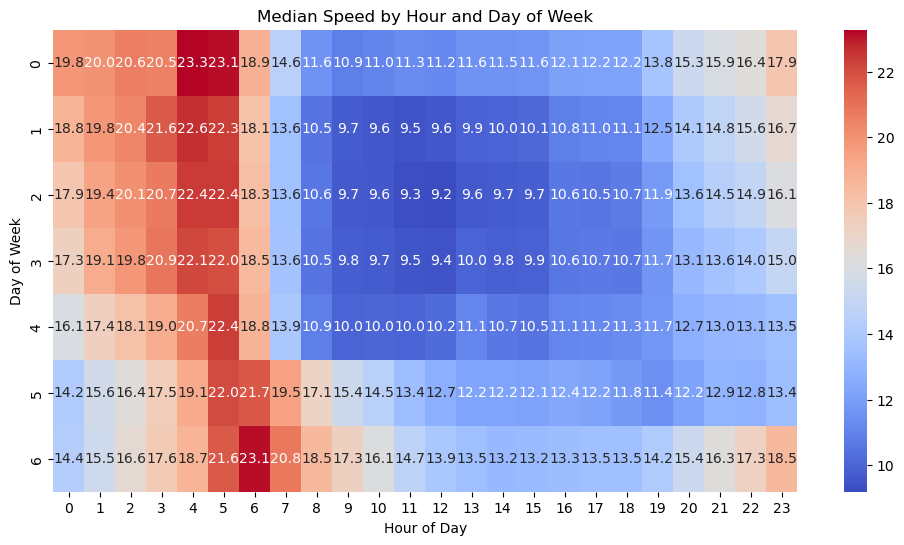

In [49]:
avg_speed_hour_weekday = train_data.groupby(['day_of_week', 'hour_of_day'])['med_speed'].median()

median_speed_pivot = avg_speed_hour_weekday.unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(median_speed_pivot, cmap="coolwarm", annot=True, fmt=".1f")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title("Median Speed by Hour and Day of Week")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [51]:
train_data = train_data.drop('med_speed', axis = 1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [53]:
# с 8 до 20 жуткие пробки

train_data['is_probka'] = ((train_data['hour_of_day'] >= 8) & 
                           (train_data['hour_of_day'] < 22) & 
                           (train_data['day_of_week'] >= 0) & 
                           (train_data['day_of_week'] <= 5)).astype(int)
train_data['isnt_probka'] = ((train_data['hour_of_day'] >= 0) &
                            (train_data['hour_of_day'] <= 6)).astype(int)


In [55]:
train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_year,hour_of_day,month,day_of_week,is_anom,haversine,log_haversine,is_probka,isnt_probka
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,17,3,0,0,1.498521,0.915699,1,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,0,6,6,0,1.805507,1.031584,0,1
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,11,1,1,0,6.385098,1.999464,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,19,4,2,0,1.485498,0.910473,1,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,13,3,5,0,1.188588,0.783257,1,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [57]:
#grand central terminal
#john f kennedy intern air
#laпuardia airport 
# какая же эта дрочка

from geopy.distance import geodesic

# сделаем проверку высадки посадки в радиусе километра
def is_near_location(lat, lon, target_lat, target_lon, radius_km=1.0):
    return int(geodesic((lat, lon), (target_lat, target_lon)).km < radius_km)


GRAND_CENTRAL = (40.7527, -73.9772)
JFK_AIRPORT = (40.6413, -73.7781)
LAGUARDIA_AIRPORT = (40.7769, -73.8740)

def add_location_features(df, location_name, location_coords):
    df[f'pickup_{location_name}'] = df.apply(
        lambda row: is_near_location(row['pickup_latitude'], row['pickup_longitude'], 
                                     location_coords[0], location_coords[1]), axis=1)
    
    df[f'dropoff_{location_name}'] = df.apply(
        lambda row: is_near_location(row['dropoff_latitude'], row['dropoff_longitude'], 
                                     location_coords[0], location_coords[1]), axis=1)

add_location_features(train_data, "grand_central", GRAND_CENTRAL)
add_location_features(train_data, "jfk", JFK_AIRPORT)
add_location_features(train_data, "laguardia", LAGUARDIA_AIRPORT)


In [58]:
train_data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,is_probka,isnt_probka,pickup_grand_central,dropoff_grand_central,pickup_jfk,dropoff_jfk,pickup_laguardia,dropoff_laguardia
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,1.498521,0.915699,1,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,1.805507,1.031584,0,1,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,6.385098,1.999464,1,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,1.485498,0.910473,1,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,1.188588,0.783257,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,...,1.225080,0.799793,1,0,1,0,0,0,0,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,...,6.049836,1.953004,0,0,0,0,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,...,7.824606,2.177544,0,1,0,0,0,0,0,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,...,1.092564,0.738390,1,0,1,1,0,0,0,0


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

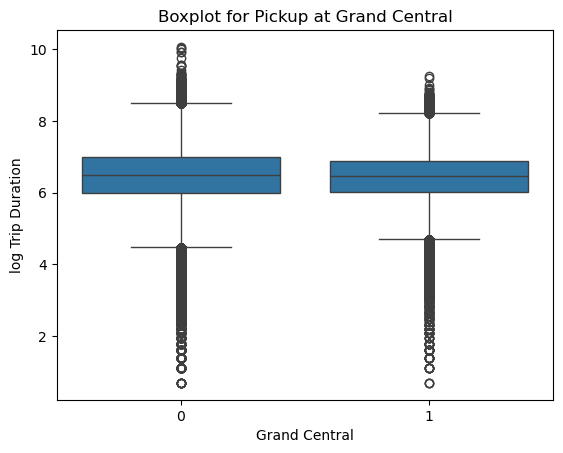

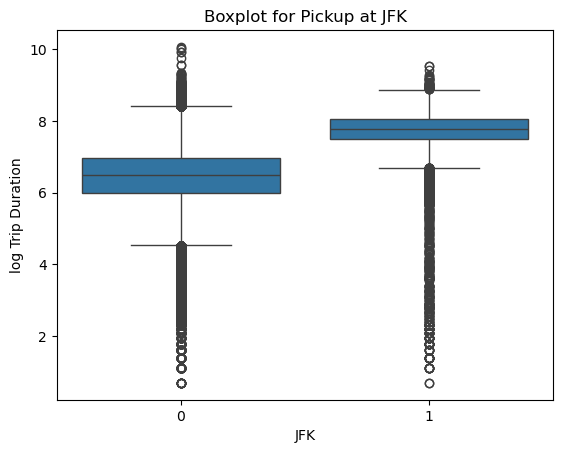

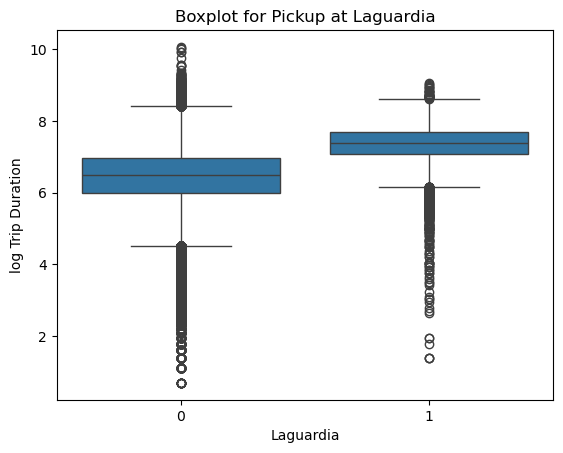

In [61]:


sns.boxplot(data=train_data, 
            x="pickup_grand_central", 
            y="trip_duration_log",)

plt.xlabel("Grand Central")
plt.ylabel("log Trip Duration")
plt.title("Boxplot for Pickup at Grand Central")
plt.show()

sns.boxplot(data=train_data, 
            x="pickup_jfk", 
            y="trip_duration_log",)

plt.xlabel("JFK")
plt.ylabel("log Trip Duration")
plt.title("Boxplot for Pickup at JFK")
plt.show()

sns.boxplot(data=train_data, 
            x="pickup_laguardia", 
            y="trip_duration_log",)

plt.xlabel("Laguardia")
plt.ylabel("log Trip Duration")
plt.title("Boxplot for Pickup at Laguardia")
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

нет, хуйня

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 n_rows=10, 
                 n_cols=10, 
                 lat_col_start='pickup_latitude', 
                 lon_col_start='pickup_longitude',
                 lat_col_end='dropoff_latitude', 
                 lon_col_end='dropoff_longitude'):
        """
        n_rows, n_cols — количество строк и столбцов в сетке.
        lat_col_start, lon_col_start — названия колонок с широтой и долготой начала поездки.
        lat_col_end, lon_col_end — названия колонок с широтой и долготой конца поездки.
        """
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_col_start = lat_col_start
        self.lon_col_start = lon_col_start
        self.lat_col_end = lat_col_end
        self.lon_col_end = lon_col_end

    def fit(self, X, y=None):
        """
        На этапе fit вычисляем границы (min и max) по широте и долготе
        для обучающей выборки. Это будет наш bounding box.
        """
        # Минимальная и максимальная широта (учитываем и начало, и конец поездки)
        self.min_lat_ = X[[self.lat_col_start, self.lat_col_end]].min().min()
        self.max_lat_ = X[[self.lat_col_start, self.lat_col_end]].max().max()

        # Минимальная и максимальная долгота (учитываем и начало, и конец поездки)
        self.min_lon_ = X[[self.lon_col_start, self.lon_col_end]].min().min()
        self.max_lon_ = X[[self.lon_col_start, self.lon_col_end]].max().max()

        # Чтобы потом быстро преобразовывать координаты в индексы,
        # запомним "шаг" по широте и долготе.
        self.lat_step_ = (self.max_lat_ - self.min_lat_) / self.n_rows
        self.lon_step_ = (self.max_lon_ - self.min_lon_) / self.n_cols

        return self

    def transform(self, X, y=None):
        """
        Используя границы из fit(), рассчитываем для каждой точки (начало, конец)
        индекс ячейки в сетке. Если координаты вне bounding box, будет -1.
        """
        # Создаём копию, чтобы не менять X inplace
        X_trans = X.copy()

        # Вспомогательная функция для расчёта индекса ячейки
        def get_cell_index(lat_values, lon_values):
            """
            Для массива (lat_values, lon_values) считаем векторно:
            row = floor((lat - min_lat_) / lat_step_)
            col = floor((lon - min_lon_) / lon_step_)
            Если что-то выходит за границы — присваиваем -1
            """
            row = np.floor((lat_values - self.min_lat_) / self.lat_step_).astype(int)
            col = np.floor((lon_values - self.min_lon_) / self.lon_step_).astype(int)

            # Проверяем, лежит ли точка в нужных пределах
            mask_in_range = ((row >= 0) & (row < self.n_rows) &
                             (col >= 0) & (col < self.n_cols))

            # Считаем линейный индекс (row * n_cols + col),
            # но для точек вне сетки делаем -1
            cell_id = row * self.n_cols + col
            cell_id[~mask_in_range] = -1

            return cell_id

        # Извлекаем координаты начала и конца
        lat_start = X_trans[self.lat_col_start].values
        lon_start = X_trans[self.lon_col_start].values
        lat_end = X_trans[self.lat_col_end].values
        lon_end = X_trans[self.lon_col_end].values

        # Создаём два новых признака
        X_trans['cell_start'] = get_cell_index(lat_start, lon_start)
        X_trans['cell_end']   = get_cell_index(lat_end, lon_end)

        # Возвращаем DataFrame/массив с добавленными столбцами
        return X_trans
# Инициализируем трансформер
transformer = MapGridTransformer(n_rows=10, n_cols=10)

# "Учимся" на train_data — находим bounding box
transformer.fit(train_data)

# Преобразуем данные train_data
train_data_transformed = transformer.transform(train_data)

train_data_transformed.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_duration_log', 'day_of_year', 'hour_of_day', 'month',
       'day_of_week', 'is_anom', 'haversine', 'log_haversine', 'is_probka',
       'isnt_probka', 'pickup_grand_central', 'dropoff_grand_central',
       'pickup_jfk', 'dropoff_jfk', 'pickup_laguardia', 'dropoff_laguardia',
       'cell_start', 'cell_end'],
      dtype='object')

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

cat_features = ['day_of_week', 'month', 'is_probka', 'isnt_probka', 
    'pickup_grand_central', 'dropoff_grand_central', 'pickup_jfk', 
    'dropoff_jfk', 'pickup_laguardia', 'dropoff_laguardia', 'cell_start', 'cell_end']

numeric_features = ['pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 
    'hour_of_day', 'haversine', 'log_haversine', 'is_anom']  # перенес is_anom сюда

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создаём пайплайн
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

# Обучаем модель
model = pipeline.fit(X_train, y_train)

# Делаем предсказания
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Вычисляем RMSE
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))


Test RMSE = 349.3872
Train RMSE = 352.2054


In [67]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.7121
Test R²: 0.7139


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

можем считать, что если пассажиров несколько, то потенциально поездка будет дольше, потому что возможна ситуация когда надо развести пассажиров в разные точки, а значит дольше поездка выйдет

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [69]:
unique_counts = train_data_transformed.nunique()
print(unique_counts)

id                       1426659
vendor_id                      2
pickup_datetime          1351376
passenger_count                7
pickup_longitude           21628
pickup_latitude            44237
dropoff_longitude          32395
dropoff_latitude           61068
store_and_fwd_flag             2
trip_duration               5984
trip_duration_log           5984
day_of_year                  182
hour_of_day                   24
month                          6
day_of_week                    7
is_anom                        2
haversine                1426648
log_haversine            1426648
is_probka                      2
isnt_probka                    2
pickup_grand_central           2
dropoff_grand_central          2
pickup_jfk                     2
dropoff_jfk                    2
pickup_laguardia               2
dropoff_laguardia              2
cell_start                    22
cell_end                      32
dtype: int64


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

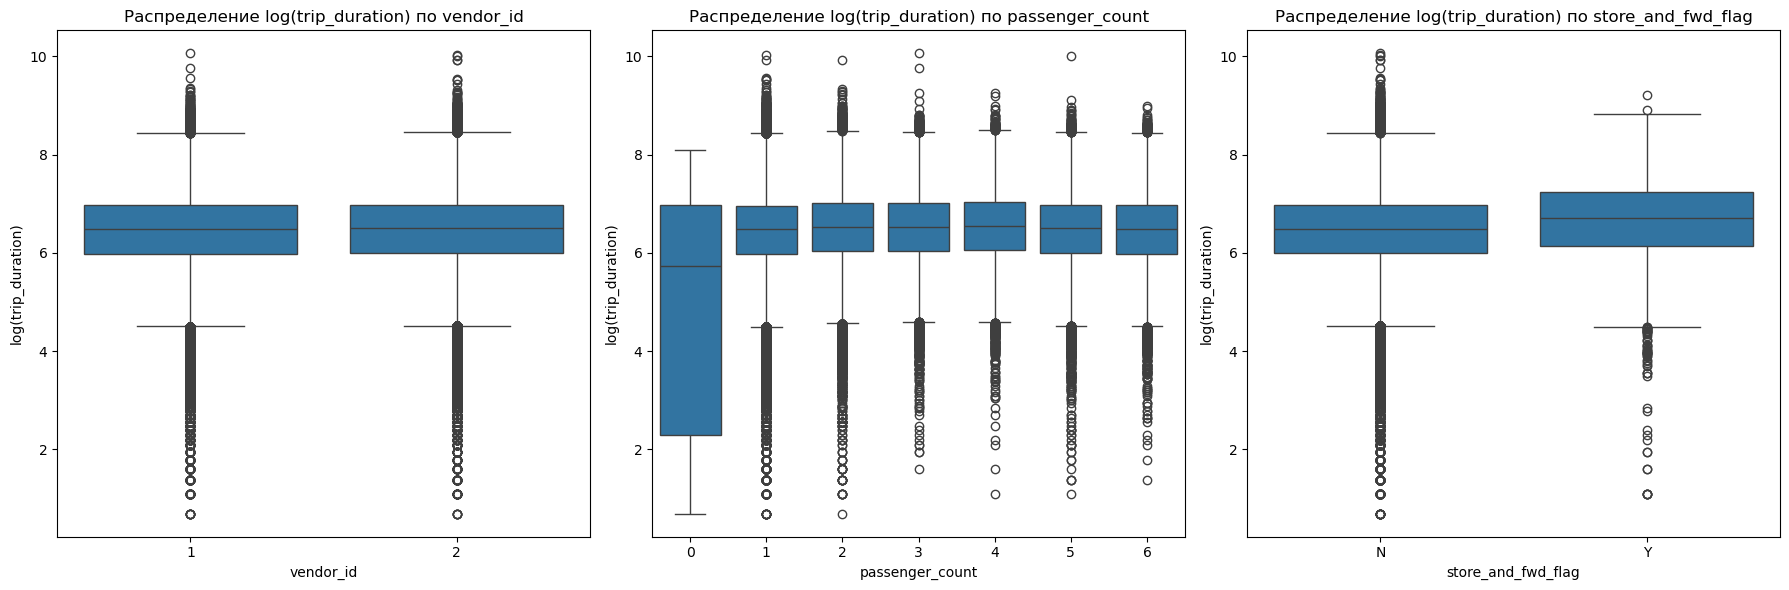

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
log_trip_duration = train_data_transformed['trip_duration_log']

for i, feature in enumerate(features):
    sns.boxplot(x=train_data_transformed[feature], y=log_trip_duration, ax=axes[i])
    axes[i].set_title(f'Распределение log(trip_duration) по {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('log(trip_duration)')

plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [73]:
train_data_transformed['vendor_id'] = train_data_transformed['vendor_id'].astype(int)
train_data_transformed['store_and_fwd_flag'] = train_data_transformed['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [75]:
cat_features = ['passenger_count', 'vendor_id', 'store_and_fwd_flag','day_of_week', 'month', 'is_probka', 'isnt_probka', 
    'pickup_grand_central', 'dropoff_grand_central', 'pickup_jfk', 
    'dropoff_jfk', 'pickup_laguardia', 'dropoff_laguardia', 'cell_start', 'cell_end']

numeric_features = ['pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 
    'hour_of_day', 'haversine', 'log_haversine', 'is_anom']  # перенес is_anom сюда

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))
# было:
# Test RMSE = 349.3872
# Train RMSE = 352.2054

Test RMSE = 349.2567
Train RMSE = 352.0248


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

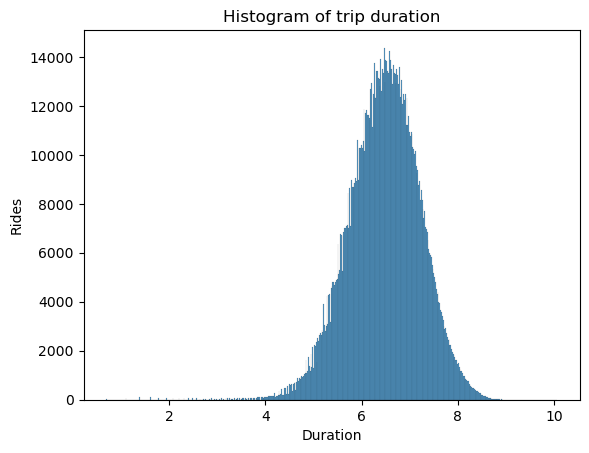

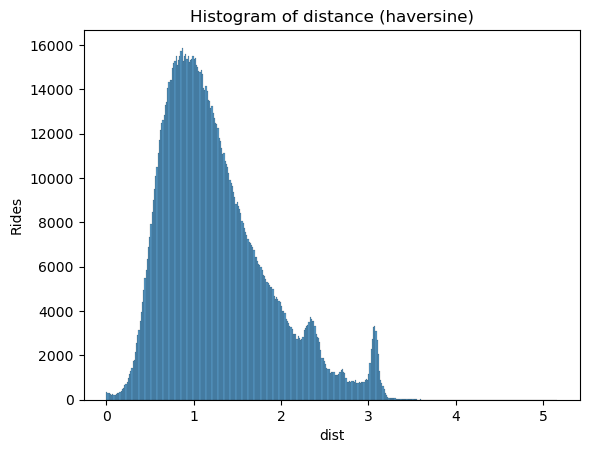

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


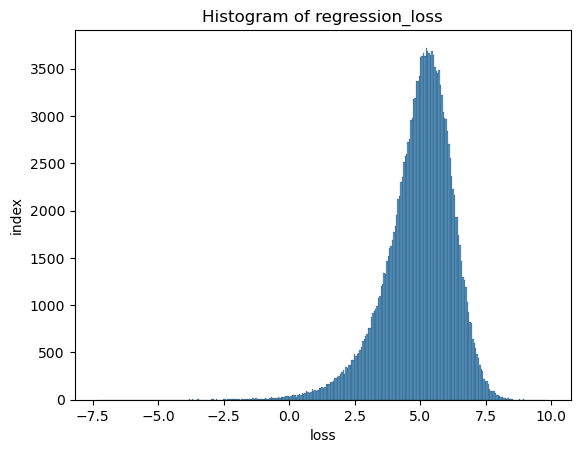

In [77]:

sns_plot = sns.histplot(train_data_transformed['trip_duration_log'])
fig = sns_plot.get_figure()

plt.title('Histogram of trip duration')
plt.xlabel('Duration')
plt.ylabel('Rides')
plt.show()


sns_plot = sns.histplot(np.log1p(train_data_transformed['haversine']))
fig = sns_plot.get_figure()

plt.title('Histogram of distance (haversine)')
plt.xlabel('dist')
plt.ylabel('Rides')
plt.show()

residuals = y_test - y_pred

sns_plot = sns.histplot(np.log1p(residuals))
plt.title("Histogram of regression_loss")
plt.xlabel('loss')
plt.ylabel('index')
plt.show()

# обрежу 

In [79]:
train_data_transformed = train_data_transformed[train_data_transformed['log_haversine'] < train_data_transformed['log_haversine'].quantile(0.99)]

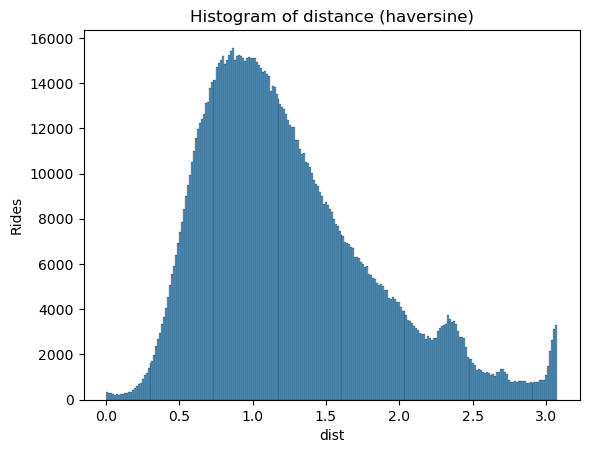

In [81]:
sns_plot = sns.histplot(np.log1p(train_data_transformed['haversine']))
fig = sns_plot.get_figure()

plt.title('Histogram of distance (haversine)')
plt.xlabel('dist')
plt.ylabel('Rides')
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).


ммм, наверное можно объеденить 2 аэропорта

In [83]:
train_data_transformed = train_data_transformed.copy()

train_data_transformed['trip_to_airport'] = (
    train_data_transformed['pickup_jfk'] + train_data_transformed['dropoff_jfk'] +
    train_data_transformed['pickup_laguardia'] + train_data_transformed['dropoff_laguardia']
).clip(0, 1)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [85]:
cat_features = ['passenger_count', 'vendor_id', 'store_and_fwd_flag','day_of_week', 'month', 'is_probka', 'isnt_probka', 
                'trip_to_airport', 'cell_start', 'cell_end']

numeric_features = ['pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 
    'hour_of_day', 'log_haversine', 'is_anom']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))

# Test RMSE = 349.3872
# Train RMSE = 352.2054

# Test RMSE = 349.2567
# Train RMSE = 352.0248

# стало чуть лучше, зато точно нет переобучения
# Test RMSE = 346.3856
# Train RMSE = 344.7917

Test RMSE = 346.3856
Train RMSE = 344.7917


In [87]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.6781
Test R²: 0.6792


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [89]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (988674, 28)
Size after OneHot: (988674, 71)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [91]:
from sklearn.linear_model import Lasso


cat_features = ['passenger_count', 'vendor_id', 'store_and_fwd_flag','day_of_week', 'month', 'is_probka', 'isnt_probka', 
                'trip_to_airport', 'cell_start', 'cell_end']

numeric_features = ['pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 
    'hour_of_day', 'log_haversine', 'is_anom']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))

# Test RMSE = 349.3872
# Train RMSE = 352.2054

# Test RMSE = 349.2567
# Train RMSE = 352.0248

# стало чуть лучше, зато точно нет переобучения
# Test RMSE = 346.3856
# Train RMSE = 344.7917

# на лассо вышло чуть хуже
# Test RMSE = 346.9936
# Train RMSE = 345.3923

Test RMSE = 346.9936
Train RMSE = 345.3923


In [93]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.6770
Test R²: 0.6780


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

Best alpha = 0.0092


Text(0, 0.5, 'CV score')

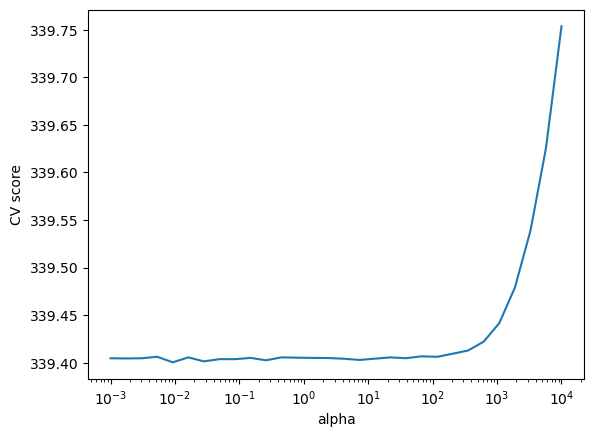

In [185]:
from sklearn.model_selection import GridSearchCV

cat_features = ['passenger_count', 'vendor_id', 'store_and_fwd_flag','day_of_week', 'month', 
                'is_probka', 'isnt_probka', 'trip_to_airport', 'cell_start', 'cell_end']

train_data_transformed['haversine_square'] = (train_data_transformed['log_haversine']**2)

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                    'day_of_year', 'hour_of_day', 'log_haversine', 'is_anom', 'haversine_square']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

alphas = np.logspace(-3, 4, 30)

searcher = GridSearchCV(pipeline, [{'regression__alpha': alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train, y_train)

# Лучшее значение alpha
best_alpha = searcher.best_params_["regression__alpha"]
print(f"Best alpha = {best_alpha:.4f}")

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [187]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))

# Test RMSE = 349.3872
# Train RMSE = 352.2054

# Test RMSE = 349.2567
# Train RMSE = 352.0248

# стало чуть лучше, зато точно нет переобучения
# Test RMSE = 346.3856
# Train RMSE = 344.7917

# Test RMSE = 346.2437
# Train RMSE = 345.0258 на лучшей альфа

# Test RMSE = 340.6279
# Train RMSE = 339.4025

Test RMSE = 340.6279
Train RMSE = 339.4025


In [189]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.6888
Test R²: 0.6888


In [193]:

y_pred = np.maximum(y_pred, 0)
y_train_pred = np.maximum(y_train_pred, 0)


Сохраните наилучшее значение, как бенчмарк на будущее

In [197]:
best_rmsle = rmsle(y_test, y_pred)
print(f"Best RMSLE = {best_rmsle:.4f}")
# было типо 0.78, я добавил полиномиальный признак и нашел лучший коэф рег

Best RMSLE = 0.5806


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [199]:

# Шаг 1: Считаем количество поездок для каждой (cell_start, cell_end) пары
top_routes = train_data_transformed.groupby(['cell_start', 'cell_end']).size().reset_index(name='count')

# Шаг 2: Выбираем ТОП-100 самых популярных маршрутов
top_routes = top_routes.sort_values(by='count', ascending=False).head(100)

# Создаём словарь (ключ: (cell_start, cell_end), значение: уникальный ID маршрута)
route_dict = {tuple(x[:2]): i for i, x in enumerate(top_routes[['cell_start', 'cell_end']].values)}

# Шаг 3: Применяем к нашему датасету
def assign_route_id(row):
    return route_dict.get((row['cell_start'], row['cell_end']), -1)  # Если маршрут не в ТОП-100 → -1

train_data_transformed['top_route_id'] = train_data_transformed.apply(assign_route_id, axis=1)


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [201]:
cat_features = ['passenger_count', 'vendor_id', 'store_and_fwd_flag','day_of_week', 'month', 
                'is_probka', 'isnt_probka', 'trip_to_airport', 'cell_start', 'cell_end', 'top_route_id']
numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                    'day_of_year', 'hour_of_day', 'log_haversine', 'is_anom', 'haversine_square']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))

# Test RMSE = 349.3872
# Train RMSE = 352.2054

# Test RMSE = 349.2567
# Train RMSE = 352.0248

# стало чуть лучше, зато точно нет переобучения
# Test RMSE = 346.3856
# Train RMSE = 344.7917

# Test RMSE = 346.2437
# Train RMSE = 345.0258 на лучшей альфа

# Test RMSE = 340.6279
# Train RMSE = 339.4025

# Test RMSE = 340.6279
# Train RMSE = 339.4025

Test RMSE = 340.1990
Train RMSE = 339.0749


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [203]:
# ужас...
import numpy as np

theta = np.radians(29)

def rotate_coordinates(lon, lat):
    x_new = np.cos(theta) * lon + np.sin(theta) * lat
    y_new = -np.sin(theta) * lon + np.cos(theta) * lat
    return x_new, y_new

train_data_transformed['pickup_x'], train_data_transformed['pickup_y'] = rotate_coordinates(
    train_data_transformed['pickup_longitude'], train_data_transformed['pickup_latitude']
)

train_data_transformed['dropoff_x'], train_data_transformed['dropoff_y'] = rotate_coordinates(
    train_data_transformed['dropoff_longitude'], train_data_transformed['dropoff_latitude']
)

train_data_transformed['manhattan_distance_adjusted'] = (
    abs(train_data_transformed['dropoff_x'] - train_data_transformed['pickup_x']) +
    abs(train_data_transformed['dropoff_y'] - train_data_transformed['pickup_y'])
)

train_data_transformed['log_manhattan_distance_adjusted'] = np.log1p(train_data_transformed['manhattan_distance_adjusted'])


In [207]:
correlation_manhattan_adjusted = train_data_transformed[['manhattan_distance_adjusted', 'trip_duration']].corr().iloc[0, 1]
correlation_log_manhattan_adjusted = train_data_transformed[['log_manhattan_distance_adjusted', 'trip_duration']].corr().iloc[0, 1]
correlation_log_haversine = train_data_transformed[['log_haversine', 'trip_duration']].corr().iloc[0, 1]

print(f"Корреляция trip_duration с manhattan_distance_adjusted: {correlation_manhattan_adjusted:.4f}")
print(f"Корреляция trip_duration с log_manhattan_distance_adjusted: {correlation_log_manhattan_adjusted:.4f}")
print(f"Корреляция trip_duration с log_haversine: {correlation_log_haversine:.4f}")


Корреляция trip_duration с manhattan_distance_adjusted: 0.7622
Корреляция trip_duration с log_manhattan_distance_adjusted: 0.7694
Корреляция trip_duration с log_haversine: 0.7879


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [209]:

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                    'day_of_year', 'hour_of_day', 'log_haversine', 'is_anom', 'haversine_square', 'log_manhattan_distance_adjusted']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), numeric_features)
])

y = train_data_transformed['trip_duration']
X = train_data_transformed.drop(columns=['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, y_train_pred))

# Test RMSE = 349.3872
# Train RMSE = 352.2054

# Test RMSE = 349.2567
# Train RMSE = 352.0248

# стало чуть лучше, зато точно нет переобучения
# Test RMSE = 346.3856
# Train RMSE = 344.7917

# Test RMSE = 346.2437
# Train RMSE = 345.0258 на лучшей альфа

# Test RMSE = 340.6279
# Train RMSE = 339.4025

# Test RMSE = 340.6279
# Train RMSE = 339.4025

# Test RMSE = 339.5896
# Train RMSE = 338.3671

Test RMSE = 339.5896
Train RMSE = 338.3671


In [211]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.6907
Test R²: 0.6907


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.